In [4]:
# import required libraries
import os
import random

import pandas as pd
# from scipy.misc import imread
import matplotlib.pyplot as plt
import numpy as np
import cv2

from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

Read Data

In [6]:
root_dir = os.path.abspath('.')
data_dir = 'data'

train = pd.read_csv(os.path.join(data_dir, 'train.csv'))
test = pd.read_csv(os.path.join(data_dir, 'test.csv'))

Explore Random Sample

Age:  OLD


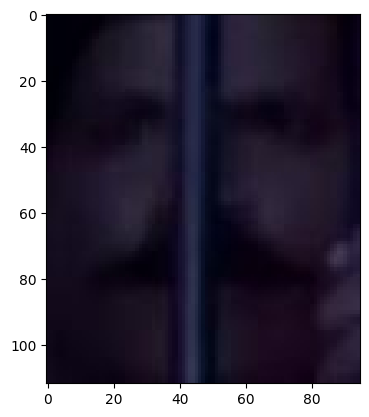

In [8]:
i = random.choice(train.index)

img_name = train.ID[i]
img = plt.imread(os.path.join(data_dir, 'Train', img_name))

print('Age: ', train.Class[i])
plt.imshow(img)

In [10]:
# Resizing the image before training
temp = []
for img_name in train.ID:
    img_path = os.path.join(data_dir, 'Train', img_name)
    img = imread(img_path)
    img = cv2.resize(img, (32, 32))
    img = img.astype('float32') 
    temp.append(img)

train_x = np.stack(temp)

In [11]:
# test images

temp = []
for img_name in test.ID:
    img_path = os.path.join(data_dir, 'Test', img_name)
    img = imread(img_path)
    img = cv2.resize(img, (32, 32))
    temp.append(img.astype('float32'))

test_x = np.stack(temp)

In [12]:
# Normalizing the images

train_x = train_x / 255.
test_x = test_x / 255.

In [13]:
train.Class.value_counts(normalize=True)

Class
MIDDLE    0.542751
YOUNG     0.336883
OLD       0.120366
Name: proportion, dtype: float64

Building the Model

In [15]:

lb = LabelEncoder()
train_y = lb.fit_transform(train.Class)
train_y = to_categorical(train_y)

In [60]:
# lb.inverse_transform([1])
label = {0:"Middle", 1: "Old", 2: "Young"}

label.get(0)

'Middle'

Model Parameters

In [16]:

input_num_units = (32, 32, 3)
hidden_num_units = 500
output_num_units = 3

epochs = 5
batch_size = 128

Experiment 1

In [17]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, InputLayer


model = Sequential([
  InputLayer(input_shape=input_num_units),
  Flatten(),
  Dense(units=hidden_num_units, activation='relu'),
  Dense(units=output_num_units, activation='softmax'),
])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 500)               1536500   
                                                                 
 dense_1 (Dense)             (None, 3)                 1503      
                                                                 
Total params: 1538003 (5.87 MB)
Trainable params: 1538003 (5.87 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [19]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(train_x, train_y, batch_size=batch_size,epochs=epochs,verbose=1)

Epoch 1/5
156/156 [==============================] - 4s 18ms/step - loss: 0.9009 - accuracy: 0.5698
Epoch 2/5
156/156 [==============================] - 3s 18ms/step - loss: 0.8424 - accuracy: 0.6044
Epoch 3/5
156/156 [==============================] - 3s 17ms/step - loss: 0.8260 - accuracy: 0.6124
Epoch 4/5
156/156 [==============================] - 3s 17ms/step - loss: 0.8096 - accuracy: 0.6266
Epoch 5/5
156/156 [==============================] - 3s 17ms/step - loss: 0.8066 - accuracy: 0.6256


With Cross-validation

In [20]:

model.fit(train_x, train_y, batch_size=batch_size,epochs=epochs,verbose=1, validation_split=0.2)

Epoch 1/5
125/125 [==============================] - 3s 27ms/step - loss: 0.7991 - accuracy: 0.6338 - val_loss: 0.7839 - val_accuracy: 0.6419
Epoch 2/5
125/125 [==============================] - 3s 20ms/step - loss: 0.7924 - accuracy: 0.6364 - val_loss: 0.7765 - val_accuracy: 0.6499
Epoch 3/5
125/125 [==============================] - 2s 19ms/step - loss: 0.7898 - accuracy: 0.6394 - val_loss: 0.7723 - val_accuracy: 0.6494
Epoch 4/5
125/125 [==============================] - 3s 23ms/step - loss: 0.7839 - accuracy: 0.6444 - val_loss: 0.8011 - val_accuracy: 0.6258
Epoch 5/5
125/125 [==============================] - 2s 19ms/step - loss: 0.7792 - accuracy: 0.6459 - val_loss: 0.8228 - val_accuracy: 0.6138


Experiment 2

In [42]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define the CNN model
model = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=input_num_units),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(units=128, activation='relu'),
    Dense(units=output_num_units, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 2304)              0         
                                                                 
 dense_2 (Dense)             (None, 128)              

Training with Cross-validation

In [43]:
model.fit(train_x, train_y, batch_size=batch_size,epochs=epochs,verbose=1, validation_split=0.2)

Epoch 1/5
125/125 [==============================] - 21s 143ms/step - loss: 0.8530 - accuracy: 0.6084 - val_loss: 0.7790 - val_accuracy: 0.6703
Epoch 2/5
125/125 [==============================] - 17s 137ms/step - loss: 0.7452 - accuracy: 0.6714 - val_loss: 0.7051 - val_accuracy: 0.7007
Epoch 3/5
125/125 [==============================] - 20s 158ms/step - loss: 0.6919 - accuracy: 0.6989 - val_loss: 0.6684 - val_accuracy: 0.7205
Epoch 4/5
125/125 [==============================] - 16s 129ms/step - loss: 0.6500 - accuracy: 0.7174 - val_loss: 0.6662 - val_accuracy: 0.7177
Epoch 5/5
125/125 [==============================] - 15s 120ms/step - loss: 0.6161 - accuracy: 0.7364 - val_loss: 0.6251 - val_accuracy: 0.7466


In [44]:
# Save model
model.save('model/my_cnn_model.h5')


c:\Users\ireti\Documents\GBC\Spring Semester\ADVANCED APPLIED MATHEMATICAL CONCEPTS FOR DEEP LEARNING CRN-82362-202203\Project 2\AAMDL_Group_10_Project\env\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
